## Document Vectors

In [2]:
import pandas as pd
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import random

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_colwidth', -1)

In [4]:
movie_lines_file = 'data/cornell-movie-dialogs/movie_lines.txt'

## Load the Movie Dialogs

In [5]:
with open(movie_lines_file) as f:
    movie_lines = [line.strip().split('+++$+++') for line in f.readlines()];

lines_df = pd.DataFrame([{'LineNumber': d[0].strip(), 
                                'Person': d[3].strip(),
                                'Line': d[4].strip(),
                                 'Movie' : d[2].strip()} 
                              for d in movie_lines])
lines_df = lines_df.set_index('LineNumber')

In [6]:
lines_df.head(10)

,Line,Movie,Person
LineNumber,,,
L1045,They do not!,m0,BIANCA
L1044,They do to!,m0,CAMERON
L985,I hope so.,m0,BIANCA
L984,She okay?,m0,CAMERON
L925,Let's go.,m0,BIANCA
L924,Wow,m0,CAMERON
L872,Okay -- you're gonna need to learn how to lie.,m0,BIANCA
L871,No,m0,CAMERON
L870,"I'm kidding. You know how sometimes you just become this ""persona""? And you don't know how to quit?",m0,BIANCA


In [7]:
len(lines_df)

304713

In [8]:
lines_df.nunique()

Line      265786
Movie     617   
Person    5356  
dtype: int64

In [9]:
lines_df_small = lines_df.head(30000)

In [10]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess

def text_to_tokens(text):
    text = text.lower()
    text = remove_stopwords(text)
    tokens = simple_preprocess(text)
    return tokens

In [11]:
class DocumentDataset(object):
    
    def __init__(self, data:pd.DataFrame, column):
        document = data[column].apply(self.preprocess)
        self.documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]
      
    def preprocess(self, document):
        return preprocess_string(remove_stopwords(document))
        
    def __iter__(self):
        for document in self.documents:
            yield documents
            
    def tagged_documents(self, shuffle=False):
        if shuffle:
            random.shuffle(self.documents)
        return self.documents

In [12]:
documents_dataset = DocumentDataset(lines_df_small, 'Line')

## Document Vector Model

In [13]:
docVecModel = Doc2Vec(min_count=1, window=5, vector_size=100, sample=1e-4, negative=5, workers=8)
docVecModel.build_vocab(documents_dataset.tagged_documents())

In [14]:
docVecModel.train(documents_dataset.tagged_documents(shuffle=True),
            total_examples = docVecModel.corpus_count,
           epochs=50)

In [15]:
docVecModel.corpus_count

30000

In [17]:
docVecModel.save('data/MovieLinesModel.d2v')

In [18]:
docVecModel = Doc2Vec.load('data/MovieLinesModel.d2v')

In [19]:
docVecModel['L872']

array([-0.00828445, -0.04834067,  0.02530375,  0.02200007, -0.00381999,
       -0.02789119,  0.02253111,  0.06437519, -0.02857402,  0.02604674,
        0.03540081,  0.00444031, -0.0119073 ,  0.04458646,  0.01003409,
        0.00631945, -0.01158736,  0.01492725, -0.00342876,  0.00298323,
       -0.00733647,  0.03548244,  0.01348062, -0.03596047,  0.00268212,
       -0.03104088, -0.00572808,  0.08256663,  0.03786438,  0.03351782,
       -0.00447931, -0.00016006,  0.00693047,  0.00757996,  0.01071337,
       -0.00911553,  0.02999022,  0.04755087,  0.04904674,  0.04624791,
        0.02559343,  0.02385002,  0.03920947, -0.00498406,  0.05396854,
       -0.0205278 , -0.0188766 ,  0.00964517, -0.00516263,  0.01327296,
       -0.01249348,  0.0267955 , -0.0183379 , -0.01168451,  0.06503777,
        0.01330364,  0.01597316, -0.01888711,  0.00336131,  0.05723583,
        0.02380397,  0.06430323, -0.03317043,  0.04646054,  0.0141423 ,
        0.03914611, -0.04198997, -0.04505408,  0.01798961, -0.01

In [20]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def show_image(vector, line):
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False, 
                   top=False,
                   labelleft=False, 
                   labelbottom=False)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)
   
    
def show_movie_line(line_number):
    line = lines_df_small.ix[line_number].Line
    doc_vector = docVecModel.docvecs[line_number]
    show_image(doc_vector, line)
    

Okay -- you're gonna need to learn how to lie.


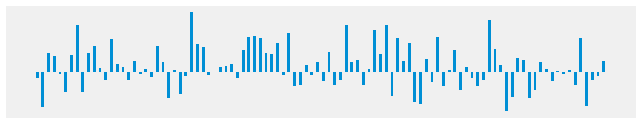

In [21]:
show_movie_line('L872')

In [22]:
docVecModel.docvecs.most_similar('L872')

[('L24549', 0.9926771521568298),
 ('L141171', 0.9923076033592224),
 ('L203270', 0.9922418594360352),
 ('L36560', 0.9922075867652893),
 ('L170718', 0.9922071695327759),
 ('L154005', 0.9921227693557739),
 ('L30638', 0.992072582244873),
 ('L180135', 0.9920064806938171),
 ('L140797', 0.9919899702072144),
 ('L16672', 0.9919706583023071)]

In [23]:
docVecModel['L3246']

array([-3.99009176e-02, -1.25370279e-01,  9.27501768e-02,  5.56772687e-02,
       -2.91119516e-02, -7.15209618e-02,  5.07396162e-02,  1.93051159e-01,
       -9.63245705e-02,  6.92170188e-02,  9.81807038e-02,  2.18086503e-02,
       -5.61617985e-02,  1.68507159e-01, -2.16714181e-02, -1.64045356e-02,
       -2.83617098e-02,  3.25716138e-02, -4.05093245e-02,  3.27888690e-02,
       -2.71240361e-02,  1.34888127e-01,  4.16132621e-02, -1.18134782e-01,
        9.96279251e-03, -1.10117532e-01, -4.38651703e-02,  2.52765745e-01,
        1.49392009e-01,  6.02526665e-02,  3.04937251e-02, -1.49334092e-02,
       -2.28669471e-03, -4.09400882e-03,  5.67176088e-04, -3.59091200e-02,
        1.05703138e-01,  1.65139630e-01,  1.68625191e-01,  1.21028453e-01,
        6.36742264e-02,  9.85130891e-02,  1.15041576e-01,  4.72197821e-03,
        1.45086288e-01, -3.36336941e-02, -1.02534756e-01,  1.50023568e-02,
       -1.66614261e-02,  2.17668079e-02, -4.25124913e-02,  1.22922041e-01,
       -3.44265439e-02, -

In [24]:
def to_vector(sentence):
    cleaned = preprocess_string(sentence)
    docVector = docVecModel.infer_vector(cleaned)
    return docVector

Okay -- you're gonna need to learn how to lie.


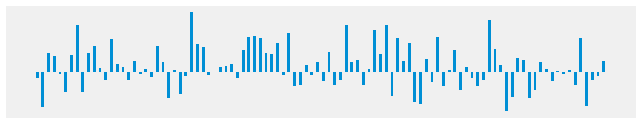

In [25]:
show_movie_line('L872')

you're gonna need to learn not to tell lies


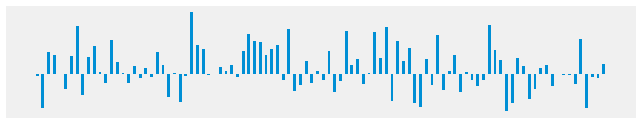

In [26]:
line = "you're gonna need to learn not to tell lies"
show_image(to_vector("you're gonna need to learn how to lie"), line)

In [27]:
def similar_movie_lines(sentence):
    vector = to_vector(sentence)
    similar_vectors = docVecModel.docvecs.most_similar(positive=[vector])
    similar_lines = [ lines_df.ix[line[0]].Line for line in similar_vectors]
    return similar_lines

similar_movie_lines("Sure, that's easy.  You gotta insult somebody.")

['Yes, Wade, I mean Twombley. Put out that cigarette. Fuck. Fuck. Fuck.',
 "Sure, that's easy.  You gotta insult somebody.",
 "No, I... I've been out on the grader all morning. Twombley's summer people. Massachusetts. Friend of Gordon's. It was his idea for Jack to take him hunting.  I gotta go.",
 "From Boston. Evan Twombley's son-in- law -- he was driving. I know where they're headed. Up the lake, Agaway. The old man's out deer hunting with Jack Hewitt, so they probably got some big weekend party planned.",
 "Look, I want to live, but I don't know where the fuck I'm gonna find two hundred bucks.",
 "That's no mystery. Julio and Paolo brought it in,  You don't want to hurt those boys, do you? I mean, they sure as Hell have got something coming, but it ain't what the Law wants to give them. You understand?  No. How could you understand.",
 "You?  Don't make me laugh.  You can't take care of shit.  You've been dicking me around since we started on this turd-hunt.  All you're good for is

In [28]:
lines_df_small.ix['L59293'].Line

'Okay, ten thousand plus a G.E. toaster oven, a Litton microwave, a Cuisinart...'